In [1]:
import warnings
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
EXP_ID = "apch"
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
stats_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_stats.csv")
stats_df.head()

,project,precision,recall,f1,auc,gmean,ap,specifi
0,activemq,0.921875,3.222656e-01,0.064453,0.921875,3.222656e-01,0.048828,4.921875e-01
1,camel,0.016196,8.919551e-09,0.000065,0.002357,6.237476e-07,0.495598,9.031360e-13
2,cassandra,0.869488,6.790730e-01,0.840822,0.164957,5.458755e-01,0.202450,7.172178e-01
3,flink,0.002405,5.505061e-01,0.965705,0.313835,6.055172e-01,0.412756,1.165611e-02
4,groovy,0.164957,3.293821e-02,0.029575,0.053169,1.536465e-01,0.570597,3.638546e-02


In [4]:
# prepare data for heatmap of p-values
annot_p_values = np.array(stats_df.iloc[:, 1:])
p_values = np.where(annot_p_values < ALPHA, 1, 0)
p_values = pd.DataFrame(p_values, columns=stats_df.columns[1:])
annot_p_values = pd.DataFrame(annot_p_values, columns=stats_df.columns[1:])
p_values["project"] = stats_df["project"]
annot_p_values["project"] = stats_df["project"]
p_values = p_values.set_index("project")
annot_p_values = annot_p_values.set_index("project")

p_values = p_values.astype(int)
print(p_values.head())

annot_p_values = annot_p_values.round(3)
print(annot_p_values.head())

           precision  recall  f1  auc  gmean  ap  specifi
project                                                  
activemq           0       0   0    0      0   1        0
camel              1       1   1    1      1   0        1
cassandra          0       0   0    0      0   0        0
flink              1       0   0    0      0   0        1
groovy             0       1   1    0      0   0        1
           precision  recall     f1    auc  gmean     ap  specifi
project                                                          
activemq       0.922   0.322  0.064  0.922  0.322  0.049    0.492
camel          0.016   0.000  0.000  0.002  0.000  0.496    0.000
cassandra      0.869   0.679  0.841  0.165  0.546  0.202    0.717
flink          0.002   0.551  0.966  0.314  0.606  0.413    0.012
groovy         0.165   0.033  0.030  0.053  0.154  0.571    0.036


In [5]:
# print latex table
print(annot_p_values.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  precision &  recall &     f1 &    auc &  gmean &     ap &  specifi \\
project   &            &         &        &        &        &        &          \\
\midrule
activemq  &      0.922 &   0.322 &  0.064 &  0.922 &  0.322 &  0.049 &    0.492 \\
camel     &      0.016 &   0.000 &  0.000 &  0.002 &  0.000 &  0.496 &    0.000 \\
cassandra &      0.869 &   0.679 &  0.841 &  0.165 &  0.546 &  0.202 &    0.717 \\
flink     &      0.002 &   0.551 &  0.966 &  0.314 &  0.606 &  0.413 &    0.012 \\
groovy    &      0.165 &   0.033 &  0.030 &  0.053 &  0.154 &  0.571 &    0.036 \\
hbase     &      0.005 &   0.000 &  0.377 &  0.092 &  0.580 &  0.005 &    0.000 \\
hive      &      0.011 &   0.002 &  0.952 &  0.217 &  0.035 &  0.194 &    0.002 \\
ignite    &      0.000 &   0.000 &  0.017 &  0.003 &  0.000 &  0.536 &    0.000 \\
\bottomrule
\end{tabular}



<AxesSubplot: ylabel='project'>

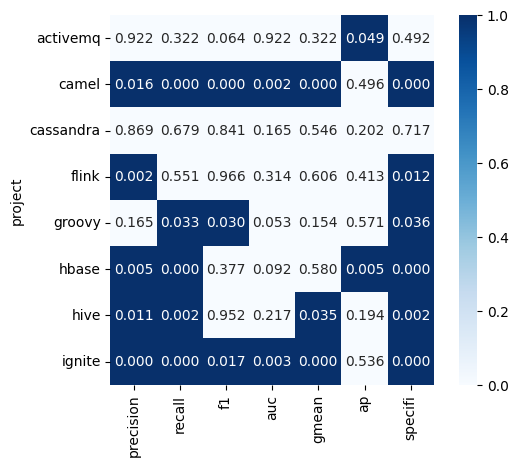

In [6]:
sns.heatmap(p_values, annot=annot_p_values, cmap="Blues", fmt=".3f", vmin=0, vmax=1, square=True)

In [8]:
cliff_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_cliff.csv")
cliff_df.head()

,project,precision,recall,f1,auc,gmean,ap,specifi
0,activemq,negligible,small,small,negligible,small,negligible,small
1,camel,negligible,small,negligible,negligible,small,negligible,small
2,cassandra,negligible,negligible,negligible,negligible,negligible,negligible,negligible
3,flink,negligible,negligible,negligible,negligible,negligible,negligible,small
4,groovy,small,medium,small,negligible,small,negligible,small


In [11]:
# prepare data for heatmap of p-values
annot_p_values = np.array(cliff_df.iloc[:, 1:])
annot_p_values = pd.DataFrame(annot_p_values, columns=cliff_df.columns[1:])
annot_p_values["project"] = cliff_df["project"]
annot_p_values = annot_p_values.set_index("project")

print(annot_p_values.head())

            precision      recall          f1         auc       gmean  \
project                                                                 
activemq   negligible       small       small  negligible       small   
camel      negligible       small  negligible  negligible       small   
cassandra  negligible  negligible  negligible  negligible  negligible   
flink      negligible  negligible  negligible  negligible  negligible   
groovy          small      medium       small  negligible       small   

                   ap     specifi  
project                            
activemq   negligible       small  
camel      negligible       small  
cassandra  negligible  negligible  
flink      negligible       small  
groovy     negligible       small  


In [12]:
# print latex table
print(annot_p_values.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &   precision &      recall &          f1 &         auc &       gmean &          ap &     specifi \\
project   &             &             &             &             &             &             &             \\
\midrule
activemq  &  negligible &       small &       small &  negligible &       small &  negligible &       small \\
camel     &  negligible &       small &  negligible &  negligible &       small &  negligible &       small \\
cassandra &  negligible &  negligible &  negligible &  negligible &  negligible &  negligible &  negligible \\
flink     &  negligible &  negligible &  negligible &  negligible &  negligible &  negligible &       small \\
groovy    &       small &      medium &       small &  negligible &       small &  negligible &       small \\
hbase     &  negligible &      medium &  negligible &  negligible &  negligible &  negligible &      medium \\
hive      &       small &       large &  negligible &  negligible &      me